<a href="https://colab.research.google.com/github/sajib006/Data-Cleaning/blob/main/datacleaning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("banking.csv")
dataset.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


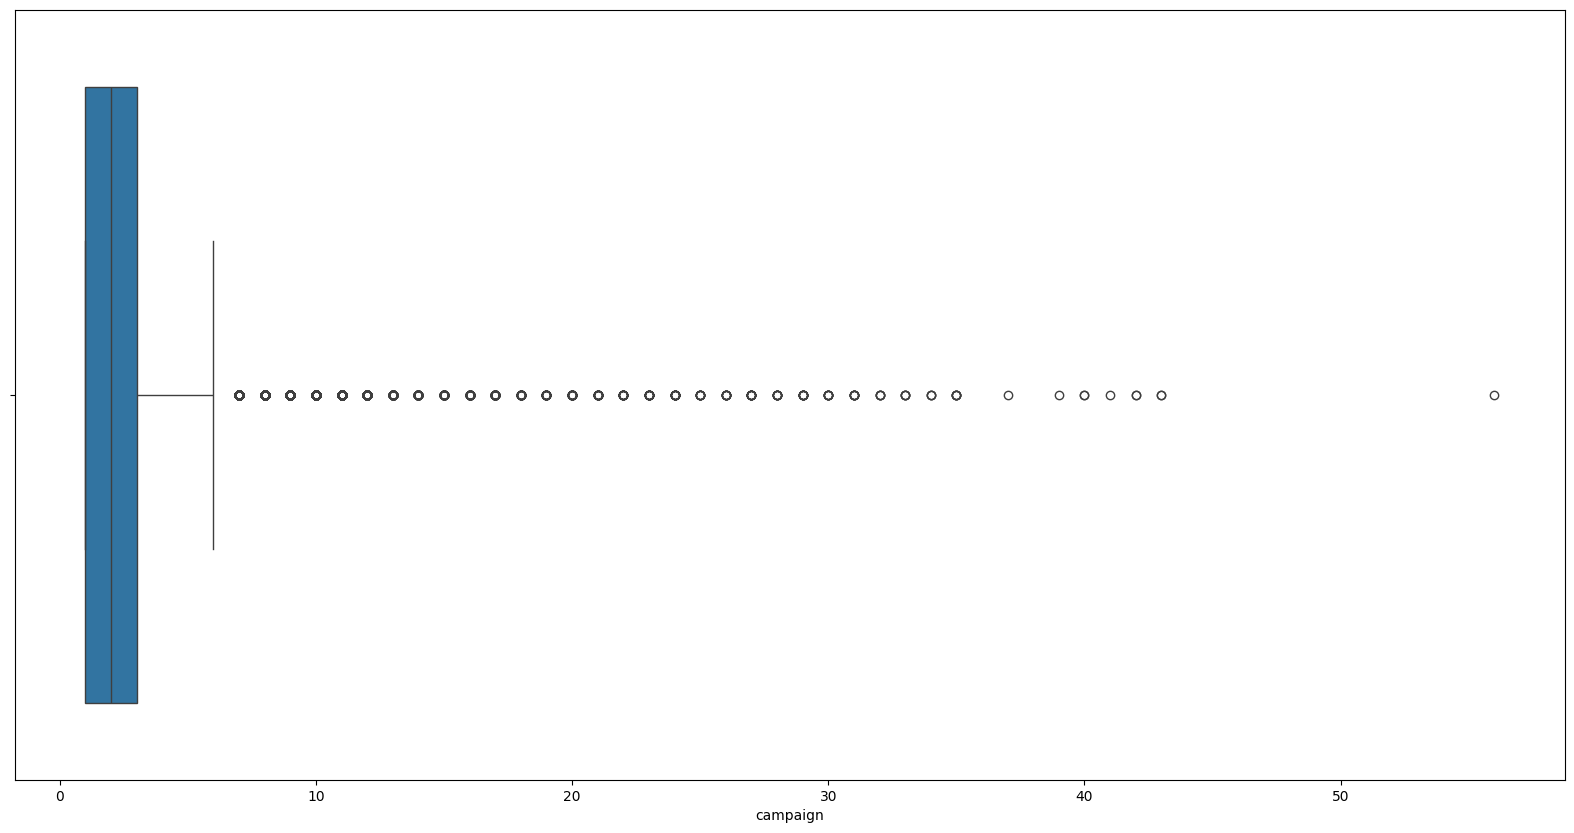

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="campaign",data=dataset)
plt.show()

/tmp/ipython-input-2524447828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["campaign"])


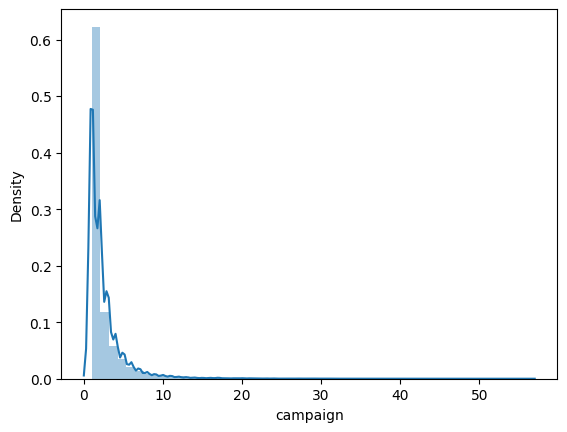

In [ ]:
sns.distplot(dataset["campaign"])
plt.show()

In [ ]:
dataset.shape

(41188, 21)

In [ ]:
q1= dataset["campaign"].quantile(0.25)
q3= dataset["campaign"].quantile(0.75)

In [ ]:
IQR= q3-q1

In [ ]:
min_range= q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(np.float64(-2.0), np.float64(6.0))

In [ ]:
new_dataset=dataset[dataset["campaign"]<=max_range]

In [ ]:
new_dataset.shape

(38782, 21)

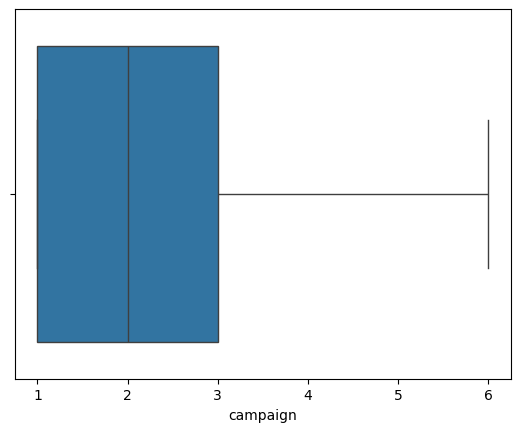

In [ ]:
sns.boxplot(x="campaign",data=new_dataset)
plt.show()

z-scor

In [ ]:
min_val= dataset["campaign"].mean()-(3*dataset["campaign"].std())
max_val= dataset["campaign"].mean()+(3*dataset["campaign"].std())

In [ ]:
min_val,max_val

(np.float64(-5.742448126036674), np.float64(10.877633131378037))

In [ ]:
new_data=dataset[dataset["campaign"]<=max_val]

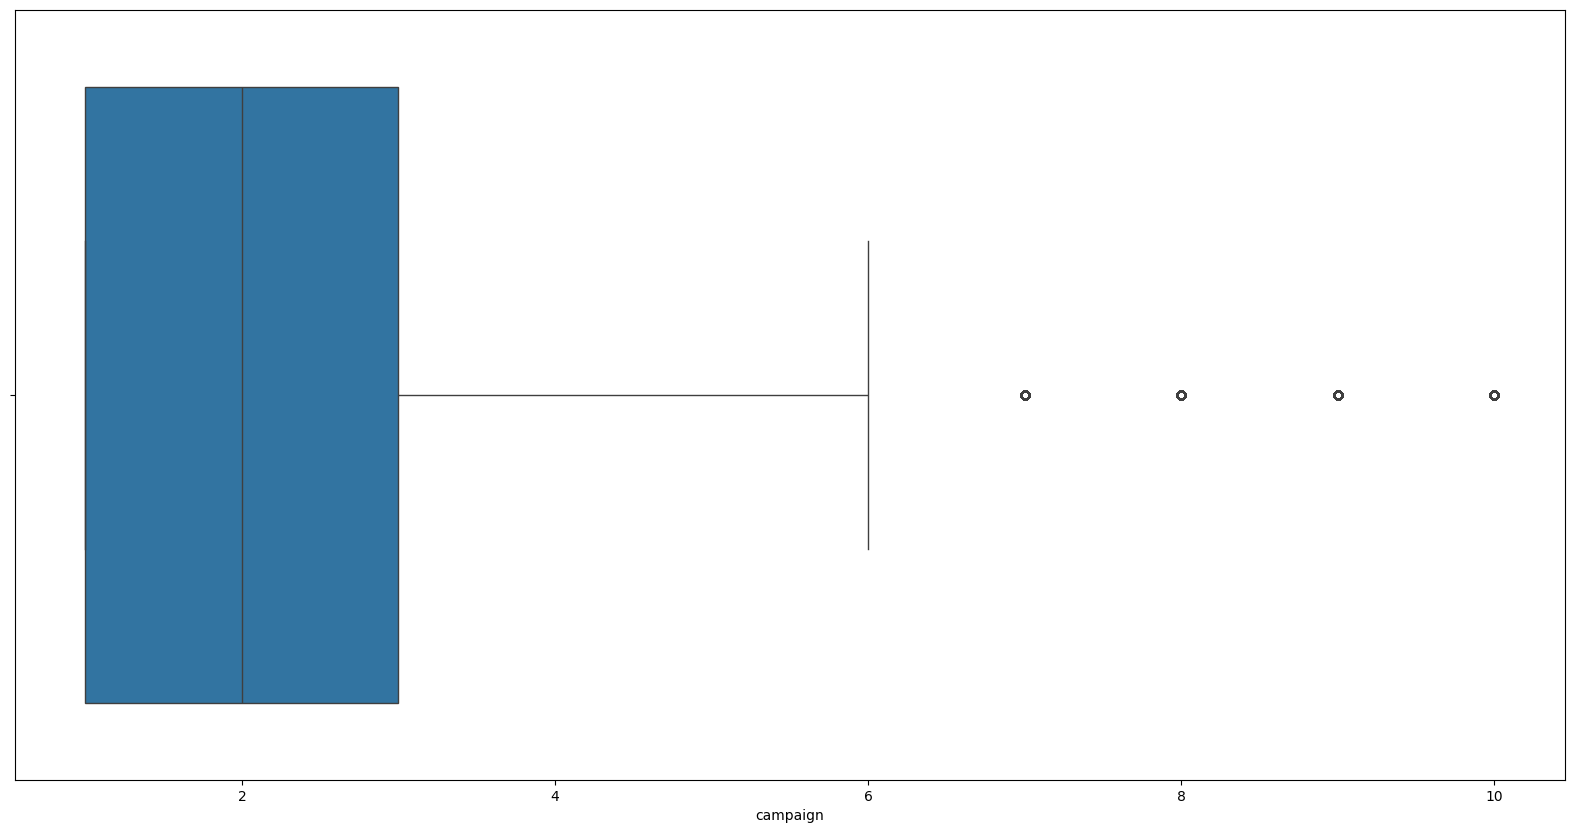

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="campaign",data=new_data)
plt.show()

In [ ]:
new_data.shape

(40319, 21)

In [ ]:
z_scor= (dataset["campaign"]-dataset["campaign"].mean())/(dataset["campaign"].std())

In [ ]:
dataset["z_scor"]=z_scor

In [ ]:
dataset[dataset["z_scor"]<3]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,z_scor
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,-0.565915
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,-0.565915
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,0.156103
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,-0.204906
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,-0.565915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0,-0.565915
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,-0.204906
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.156103
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0,-0.204906
